In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from pulse_method.toolbox_pulse import *

In [3]:
data_1_np=np.load('/Volumes/My Passport/Simulated_and_experimental_data/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size10mm_depth10pct_thickness4mm/param_fbh_gaussian_size10mm_depth10pct_thickness4mm.npz',allow_pickle=True)
data_2_np=np.load('/Volumes/My Passport/Simulated_and_experimental_data/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness 2/param_fbh_gaussian_size10mm_depth20pct_thickness4mm/param_fbh_gaussian_size10mm_depth20pct_thickness4mm.npz',allow_pickle=True)

In [16]:
data_1_np['meta']

array([['time', '17/07/2025 01:44:39'],
       ['lamp_power', '200'],
       ['lamp_power_units', 'W'],
       ['T1', '4'],
       ['T1_units', 'frames'],
       ['T2', '30'],
       ['T2_units', 'frames'],
       ['T3', '450'],
       ['T3_units', 'frames'],
       ['fps', '30.0'],
       ['fps_units', 'frames/s'],
       ['height', '512'],
       ['height_units', 'pixels'],
       ['width', '512'],
       ['width_units', 'pixels'],
       ['sequence_length', '484'],
       ['sequence_length_units', 'frames'],
       ['working_distance', '200.0'],
       ['working_distance_units', 'mm'],
       ['thickness', '0.004'],
       ['thickness_units', 'm'],
       ['size_X', '0.1'],
       ['size_X_units', 'm'],
       ['size_Y', '0.1'],
       ['size_Y_units', 'm'],
       ['thermal_conductivity', '2.0'],
       ['thermal_conductivity_units', 'W/(m·K)'],
       ['density', '1600.0'],
       ['density_units', 'kg/m^3'],
       ['specific_heat', '700.0'],
       ['specific_heat_units', 'J/(kg

In [174]:
data_1_np['data'].shape

(484, 512, 512)

In [175]:
484/30

16.133333333333333

In [17]:
data_2_np['meta']

array([['time', '17/07/2025 07:58:11'],
       ['lamp_power', '200'],
       ['lamp_power_units', 'W'],
       ['T1', '4'],
       ['T1_units', 'frames'],
       ['T2', '30'],
       ['T2_units', 'frames'],
       ['T3', '360'],
       ['T3_units', 'frames'],
       ['fps', '30.0'],
       ['fps_units', 'frames/s'],
       ['height', '512'],
       ['height_units', 'pixels'],
       ['width', '512'],
       ['width_units', 'pixels'],
       ['sequence_length', '394'],
       ['sequence_length_units', 'frames'],
       ['working_distance', '200.0'],
       ['working_distance_units', 'mm'],
       ['thickness', '0.004'],
       ['thickness_units', 'm'],
       ['size_X', '0.1'],
       ['size_X_units', 'm'],
       ['size_Y', '0.1'],
       ['size_Y_units', 'm'],
       ['thermal_conductivity', '2.0'],
       ['thermal_conductivity_units', 'W/(m·K)'],
       ['density', '1600.0'],
       ['density_units', 'kg/m^3'],
       ['specific_heat', '700.0'],
       ['specific_heat_units', 'J/(kg

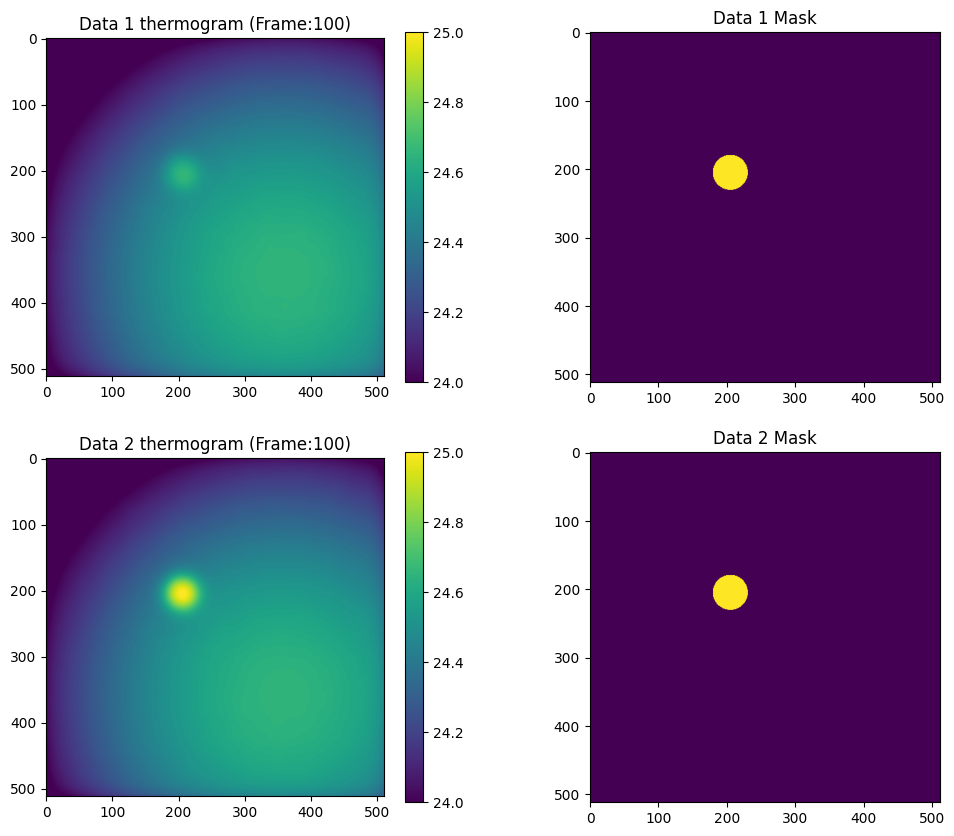

In [197]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Data 1 thermogram (Frame:100)')
plt.imshow(data_1_np['data'][100],vmin=24,vmax=25)
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Data 1 Mask')
plt.imshow(data_1_np['mask'])


plt.subplot(2,2,3)
plt.title('Data 2 thermogram (Frame:100)')
plt.imshow(data_2_np['data'][100],vmin=24,vmax=25)
plt.colorbar()

plt.subplot(2,2,4)
plt.title('Data 2 Mask')
plt.imshow(data_2_np['mask'])

In [14]:
print(f"Size of data 1: {data_1_np['data'].shape} and size of data 2: {data_2_np['data'].shape}")

Size of data 1: (484, 512, 512) and size of data 2: (394, 512, 512)


Text(0, 0.5, 'Temperature [C]')

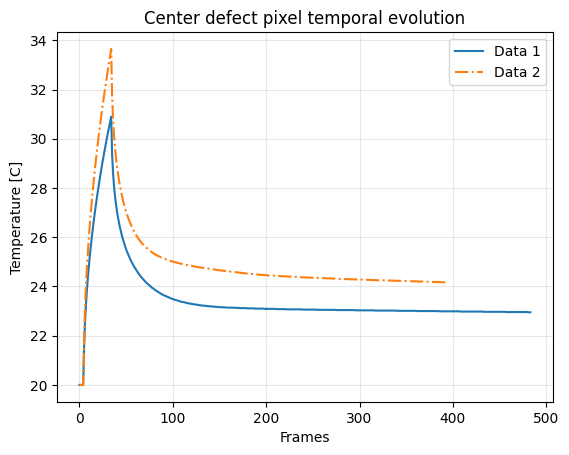

In [ ]:
plt.plot(data_1_np['data'][:,205,205],label='Data 1')
plt.plot(data_2_np['data'][:,205,205],label='Data 2',linestyle='-.')
plt.grid(alpha=0.3)
plt.title('Center defect pixel temporal evolution')
plt.legend()
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
# plt.xlim(0,100)

Text(0, 0.5, 'Temperature [C]')

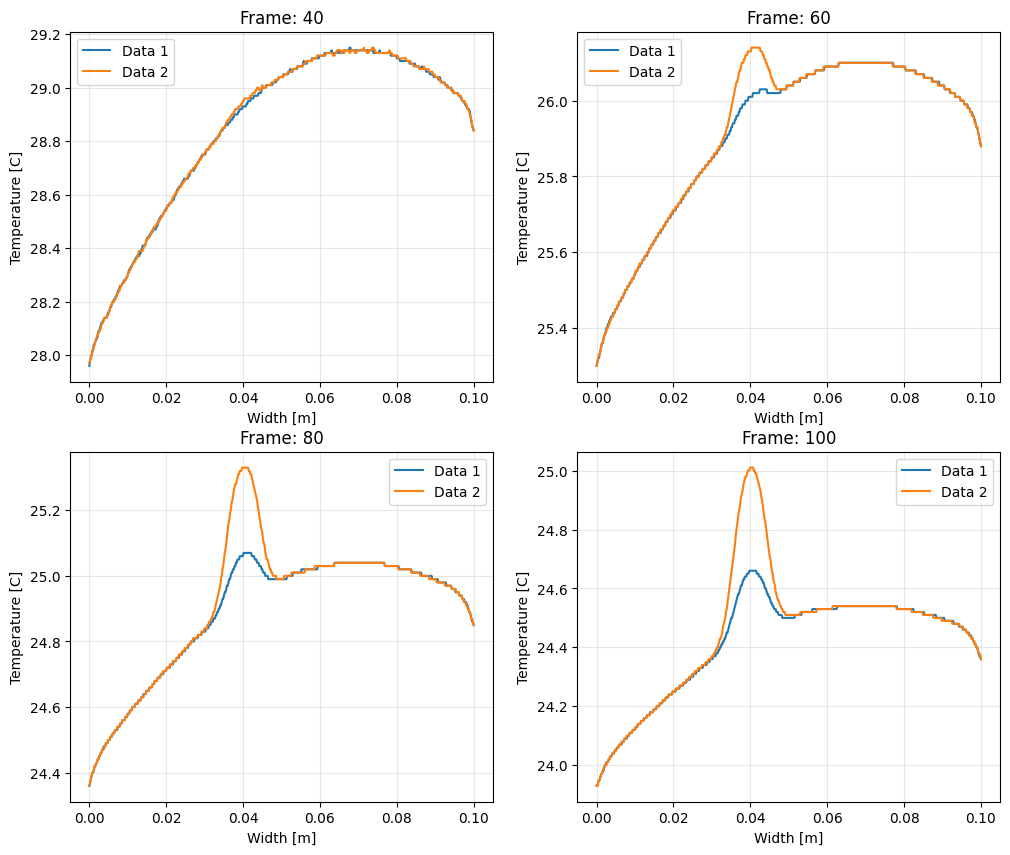

In [39]:
plt.figure(figsize=(12,10))
x=np.linspace(0,0.1,512)
plt.subplot(2,2,1)
plt.plot(x,data_1_np['data'][40,205,:],label='Data 1')
plt.plot(x,data_2_np['data'][40,205,:],label='Data 2')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Frame: 40')
plt.xlabel('Width [m]')
plt.ylabel('Temperature [C]')

plt.subplot(2,2,2)
plt.plot(x,data_1_np['data'][60,205,:],label='Data 1')
plt.plot(x,data_2_np['data'][60,205,:],label='Data 2')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Frame: 60')
plt.xlabel('Width [m]')
plt.ylabel('Temperature [C]')

plt.subplot(2,2,3)
plt.plot(x,data_1_np['data'][80,205,:],label='Data 1')
plt.plot(x,data_2_np['data'][80,205,:],label='Data 2')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Frame: 80')
plt.xlabel('Width [m]')
plt.ylabel('Temperature [C]')

plt.subplot(2,2,4)
plt.plot(x,data_1_np['data'][100,205,:],label='Data 1')
plt.plot(x,data_2_np['data'][100,205,:],label='Data 2')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Frame: 100')
plt.xlabel('Width [m]')
plt.ylabel('Temperature [C]')

Text(0, 0.5, 'Temperature [C]')

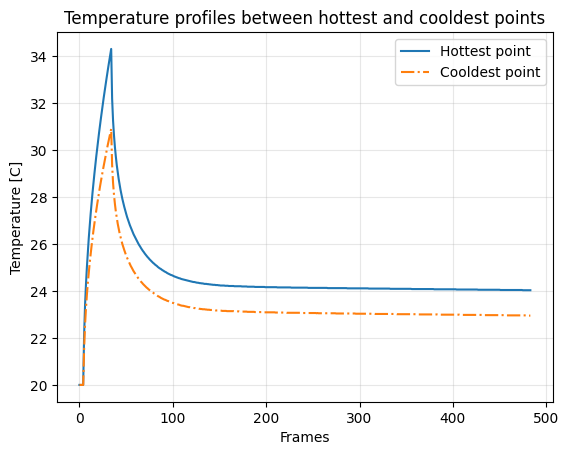

In [106]:
plt.plot(data_1_np['data'][:,331,358],label='Hottest point')
plt.plot(data_1_np['data'][:,0,0],label='Cooldest point',linestyle='-.')
plt.grid(alpha=0.3)
plt.title('Temperature profiles between hottest and cooldest points')
plt.legend()
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')

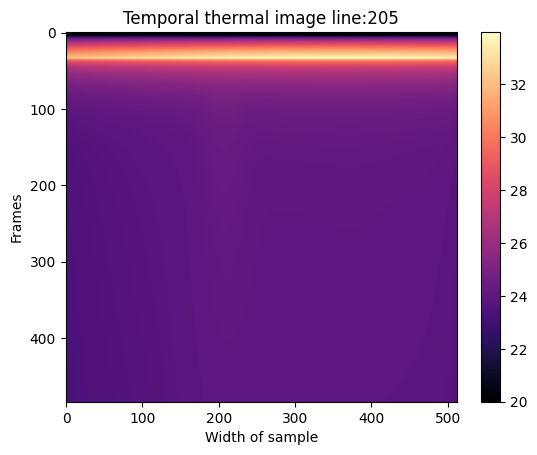

In [208]:
plt.title('Temporal thermal image line:205')
plt.imshow(data_1_np['data'][:,205,:],cmap='magma')
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar()

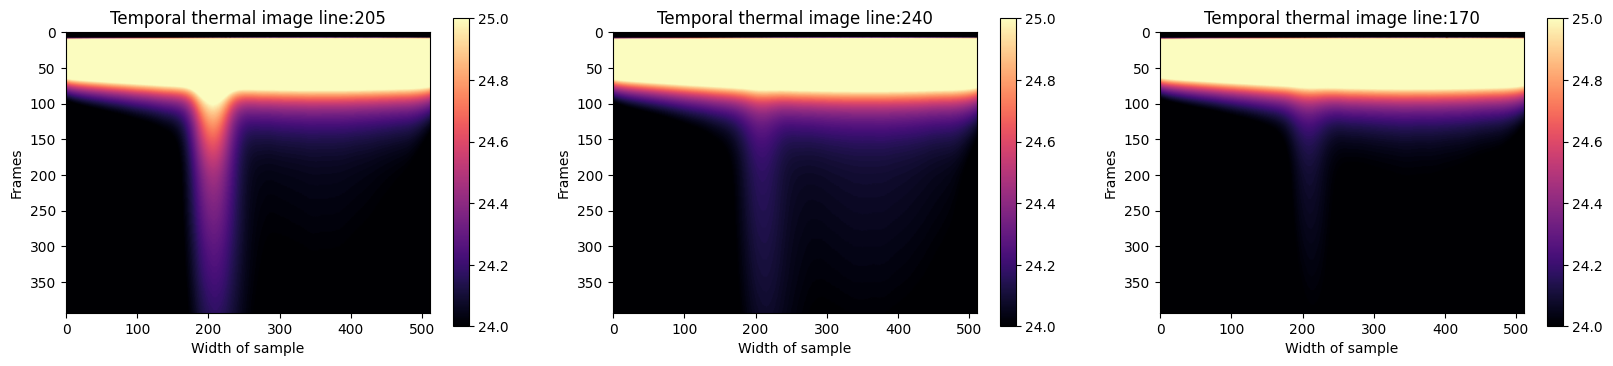

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title('Temporal thermal image line:205')
plt.imshow(data_2_np['data'][:,205,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar(shrink=0.5)

plt.subplot(1,3,2)
plt.title('Temporal thermal image line:240')
plt.imshow(data_2_np['data'][:,240,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar(shrink=0.5)

plt.subplot(1,3,3)
plt.title('Temporal thermal image line:170')
plt.imshow(data_2_np['data'][:,170,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar(shrink=0.5)

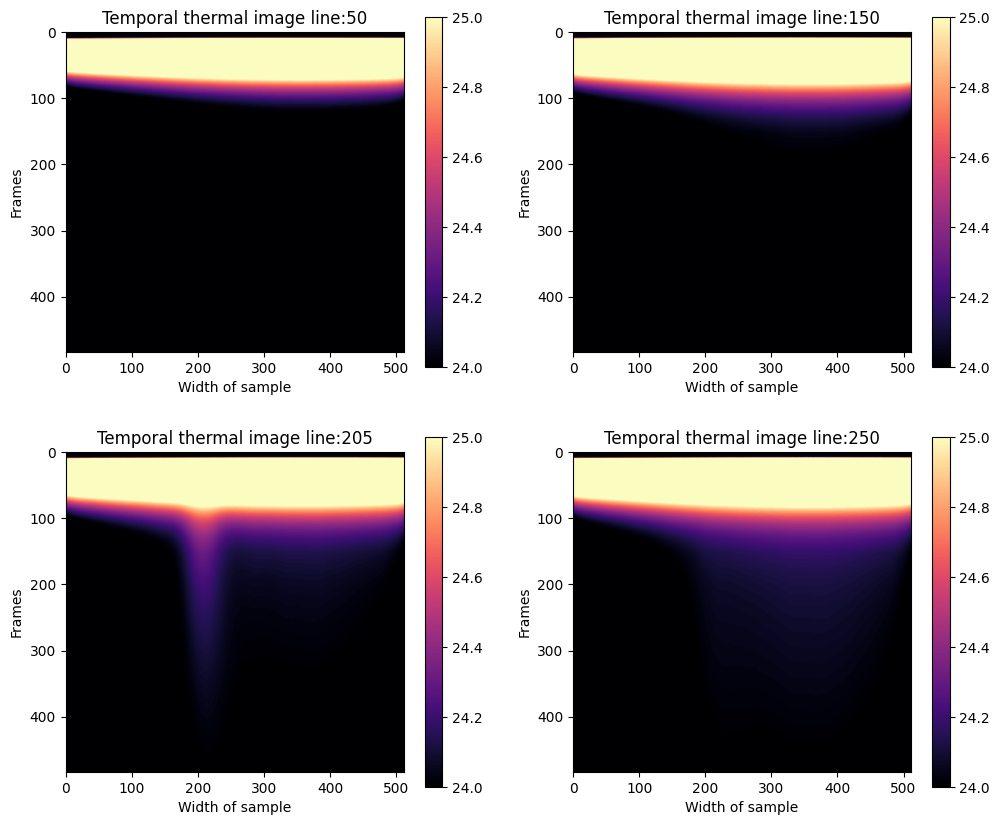

In [221]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Temporal thermal image line:50')
plt.imshow(data_1_np['data'][:,50,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Temporal thermal image line:150')
plt.imshow(data_1_np['data'][:,150,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar()

plt.subplot(2,2,3)
plt.title('Temporal thermal image line:205')
plt.imshow(data_1_np['data'][:,205,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar()

plt.subplot(2,2,4)
plt.title('Temporal thermal image line:250')
plt.imshow(data_1_np['data'][:,250,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar()

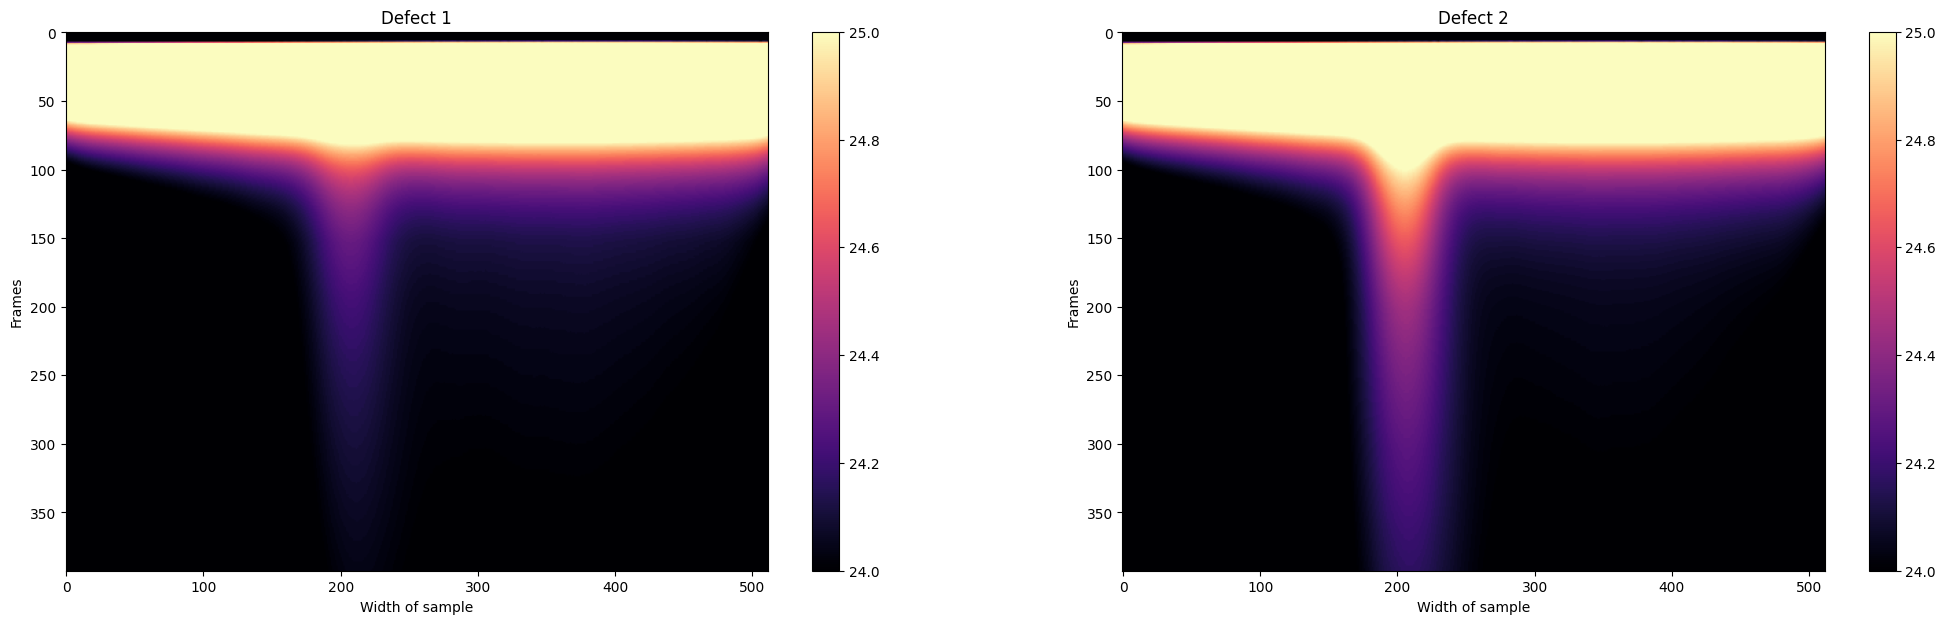

In [218]:
time_stemp=1
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.title('Defect 1')
plt.imshow(data_1_np['data'][time_stemp:393+time_stemp,205,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Defect 2')
plt.imshow(data_2_np['data'][time_stemp:,205,:],cmap='magma',vmin=24,vmax=25)
plt.xlabel('Width of sample')
plt.ylabel('Frames')
plt.colorbar()

In [211]:
data_2_np['data'][time_stemp:,205,:].shape

(393, 512)

In [27]:
data_1_np=np.load('/Volumes/My Passport/Simulated_and_experimental_data/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness/param_fbh_gaussian_size10mm_depth10pct_thickness4mm/param_fbh_gaussian_size10mm_depth10pct_thickness4mm.npz',allow_pickle=True)
data_2_np=np.load('/Volumes/My Passport/Simulated_and_experimental_data/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness 2/param_fbh_gaussian_size10mm_depth20pct_thickness4mm/param_fbh_gaussian_size10mm_depth20pct_thickness4mm.npz',allow_pickle=True)
data_3_np=np.load('/Volumes/My Passport/Simulated_and_experimental_data/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness 17/param_fbh_gaussian_size10mm_depth30pct_thickness4mm/param_fbh_gaussian_size10mm_depth30pct_thickness4mm.npz',allow_pickle=True)
data_4_np=np.load('/Volumes/My Passport/Simulated_and_experimental_data/Synthetic_data/Gaussian_heating/2025.07.15_gaussian_heat_param_study_fbh_size_depth_thickness 5/param_fbh_gaussian_size20mm_depth20pct_thickness4mm/param_fbh_gaussian_size20mm_depth20pct_thickness4mm.npz',allow_pickle=True)

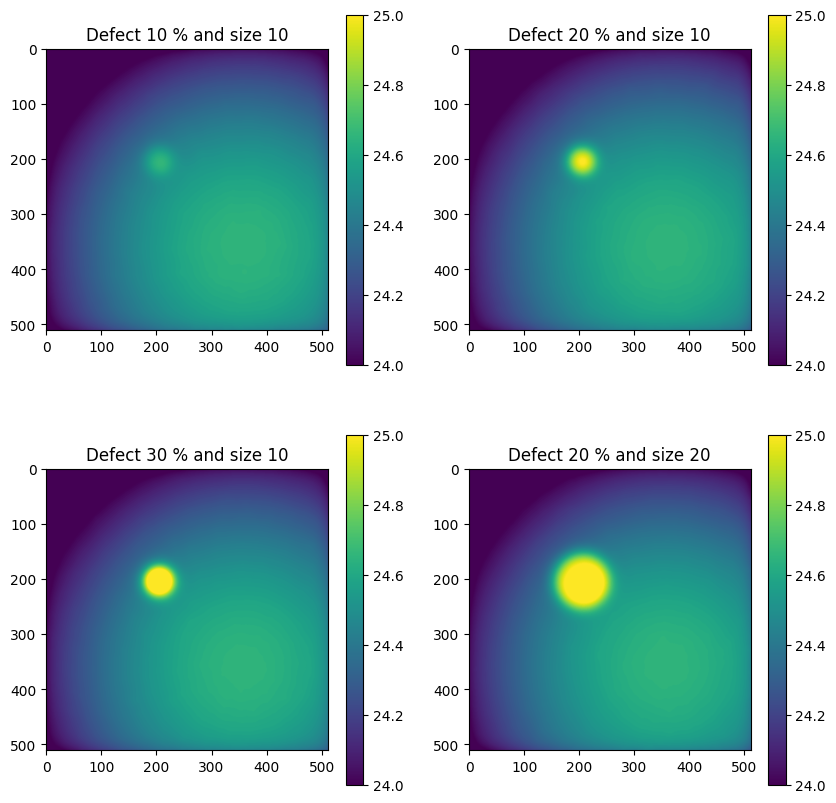

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(data_1_np['data'][100],vmin=24,vmax=25)
plt.title('Defect 10 % and size 10')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(data_2_np['data'][100],vmin=24,vmax=25)
plt.title('Defect 20 % and size 10')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(data_3_np['data'][100],vmin=24,vmax=25)
plt.title('Defect 30 % and size 10')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(data_4_np['data'][100],vmin=24,vmax=25)
plt.title('Defect 20 % and size 20')
plt.colorbar()


Text(0.5, 1.0, 'Defect 20 % and size 20')

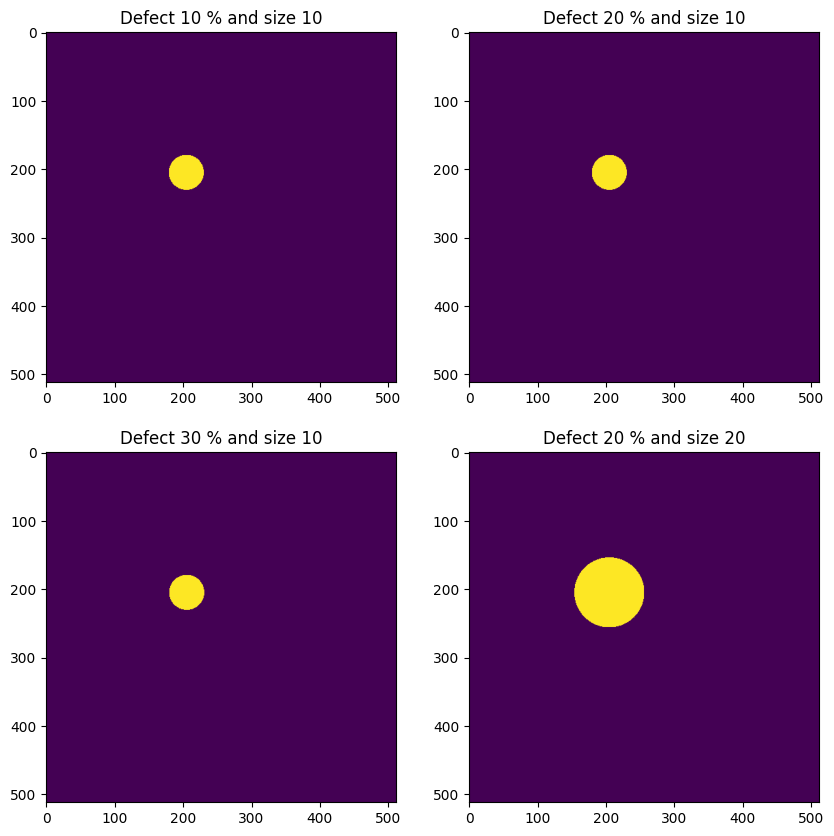

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(data_1_np['mask'])
plt.title('Defect 10 % and size 10')


plt.subplot(2,2,2)
plt.imshow(data_2_np['mask'])
plt.title('Defect 20 % and size 10')


plt.subplot(2,2,3)
plt.imshow(data_3_np['mask'])
plt.title('Defect 30 % and size 10')


plt.subplot(2,2,4)
plt.imshow(data_4_np['mask'])
plt.title('Defect 20 % and size 20')


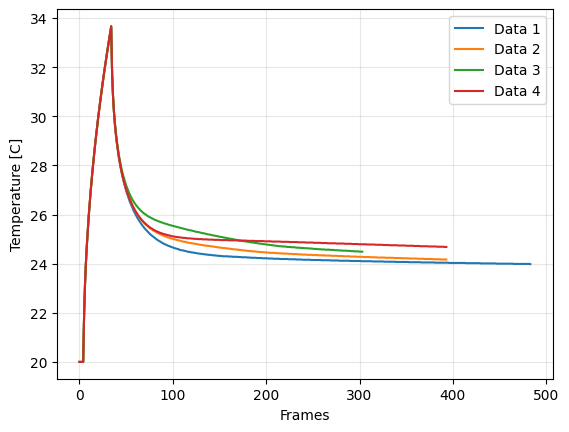

In [33]:
plt.plot(data_1_np['data'][:,205,205],label='Data 1')
plt.plot(data_2_np['data'][:,205,205],label='Data 2')
plt.plot(data_3_np['data'][:,205,205],label='Data 3')
plt.plot(data_4_np['data'][:,205,205],label='Data 4')
plt.grid(alpha=0.3)
plt.xlabel('Frames')
plt.ylabel('Temperature [C]')
plt.legend()

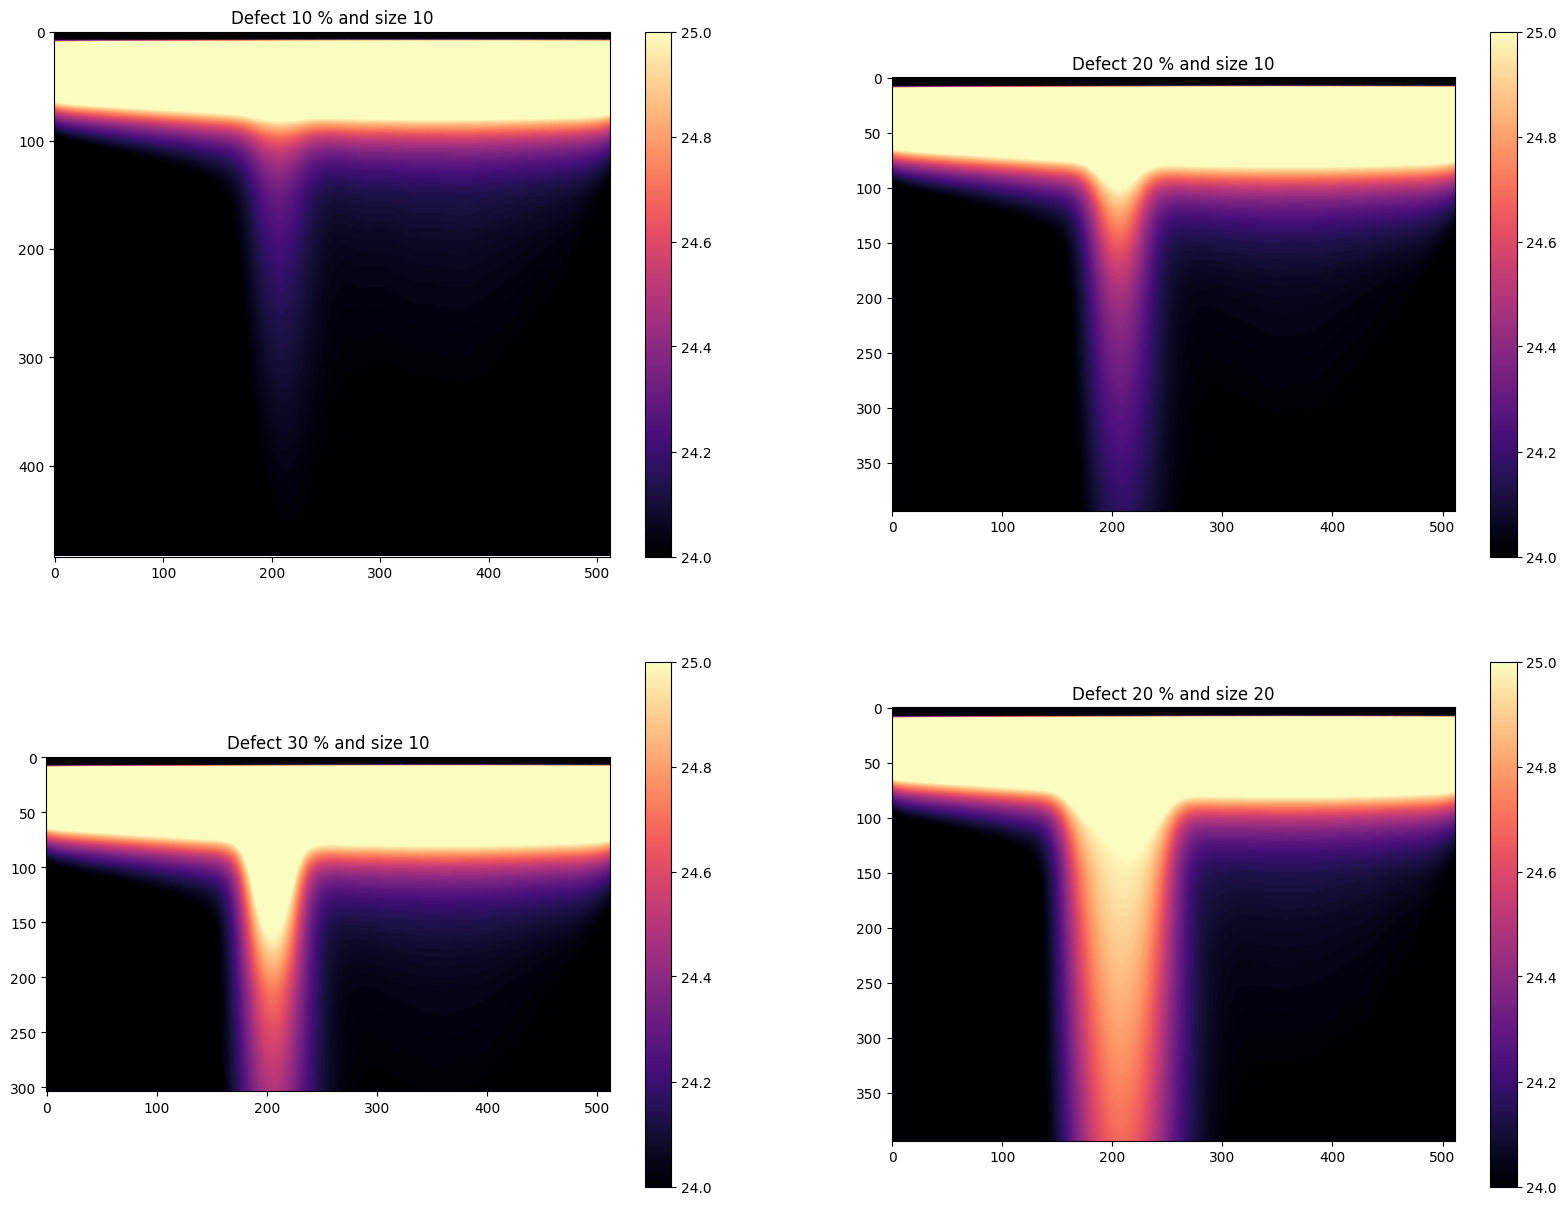

In [39]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.imshow(data_1_np['data'][:,205,:],vmin=24,vmax=25,cmap='magma')
plt.title('Defect 10 % and size 10')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(data_2_np['data'][:,205,:],vmin=24,vmax=25,cmap='magma')
plt.title('Defect 20 % and size 10')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(data_3_np['data'][:,205,:],vmin=24,vmax=25,cmap='magma')
plt.title('Defect 30 % and size 10')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(data_4_np['data'][:,205,:],vmin=24,vmax=25,cmap='magma')
plt.title('Defect 20 % and size 20')
plt.colorbar()

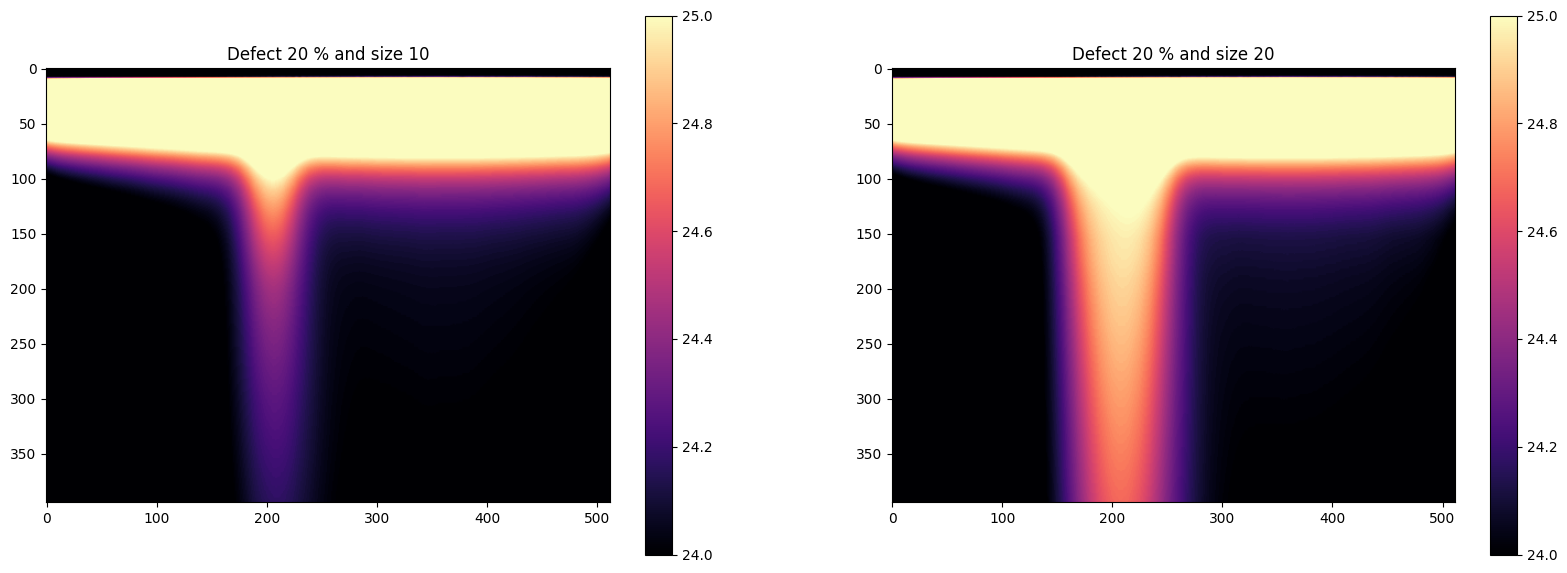

In [61]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.imshow(data_2_np['data'][:,205,:],vmin=24,vmax=25,cmap='magma')
plt.title('Defect 20 % and size 10')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(data_4_np['data'][:,205,:],vmin=24,vmax=25,cmap='magma')
plt.title('Defect 20 % and size 20')
plt.colorbar()

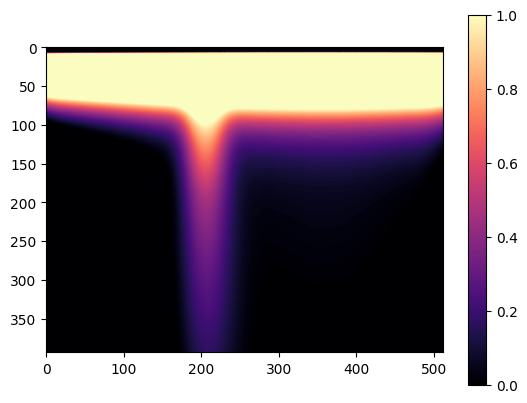

In [55]:
x=(data_2_np['data'][:,205,:]-24)/(25-24)
plt.imshow(x,cmap='magma',vmin=0,vmax=1)
plt.colorbar()

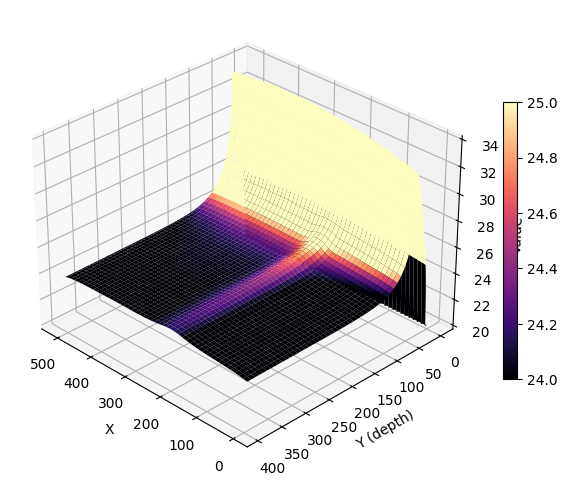

In [70]:
from matplotlib.colors import Normalize

Z = data_2_np['data'][:, 205, :]   # (Y, X)

# Z = data_4_np['data'][:, 205, :]   # (Y, X)

norm = Normalize(vmin=24, vmax=25)

ny, nx = Z.shape
x = np.arange(nx)
y = np.arange(ny)

X, Y = np.meshgrid(x, y)

# invert Y so "beginning" goes to the back
Y = Y[::-1]
Z = Z[::-1, :]


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(
    X, Y, Z,
    cmap='magma',
    norm=norm,
    linewidth=0,
    antialiased=True
)

ax.set_xlabel("X")
ax.set_ylabel("Y (depth)")
ax.set_zlabel("Value")

fig.colorbar(surf, ax=ax, shrink=0.6)
ax.view_init(elev=30, azim=135)

plt.show()


<h1>More organized analysis

In [2]:
data_1=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth10pct_thickness4mm.npz',allow_pickle=True)
data_2=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth20pct_thickness4mm.npz',allow_pickle=True)
data_3=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth30pct_thickness4mm.npz',allow_pickle=True)
data_4=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth40pct_thickness4mm.npz',allow_pickle=True)
data_5=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth50pct_thickness4mm.npz',allow_pickle=True)
data_6=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth60pct_thickness4mm.npz',allow_pickle=True)

data_1t=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth10pct_thickness3mm.npz',allow_pickle=True)
data_2t=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth20pct_thickness3mm.npz',allow_pickle=True)
data_3t=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth30pct_thickness3mm.npz',allow_pickle=True)
data_4t=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth40pct_thickness3mm.npz',allow_pickle=True)
data_5t=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth50pct_thickness3mm.npz',allow_pickle=True)
data_6t=np.load('/Users/jaworskj/Temporal_thermal_image/Data/param_fbh_gaussian_size10mm_depth60pct_thickness3mm.npz',allow_pickle=True)

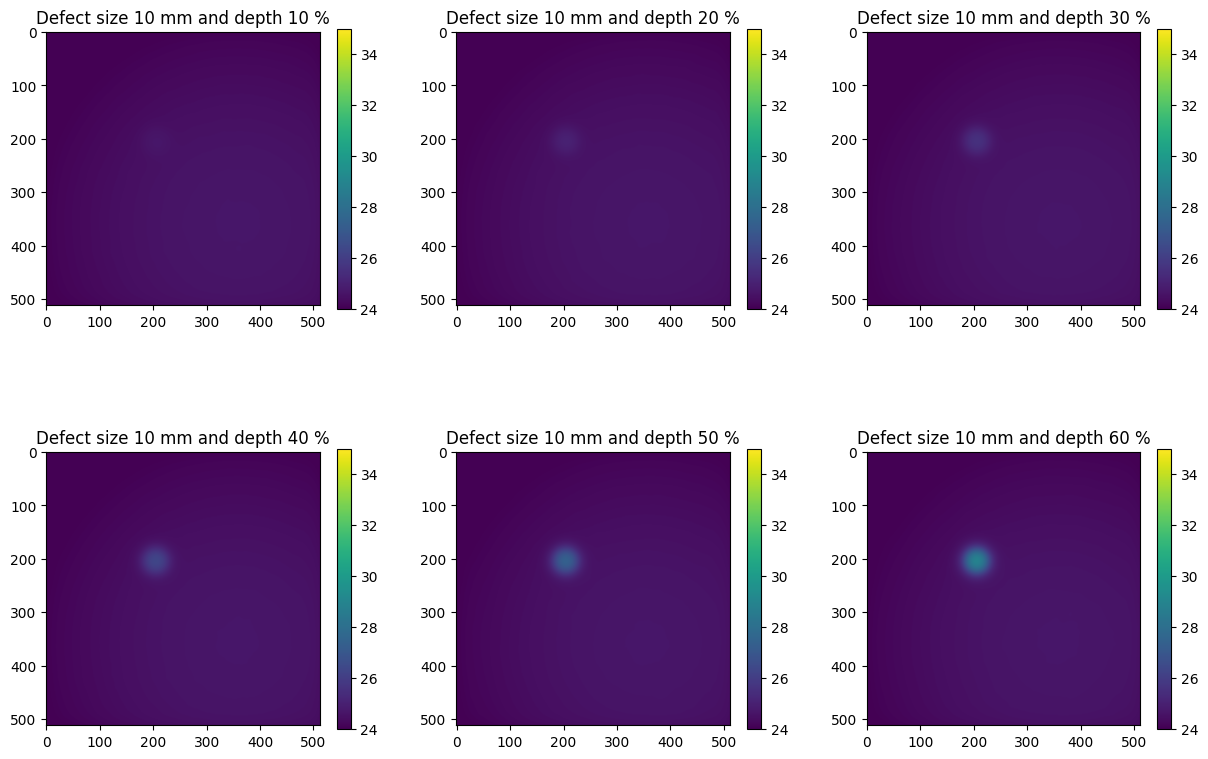

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(data_1['data'][100],vmin=24,vmax=35)
plt.title('Defect size 10 mm and depth 10 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,2)
plt.imshow(data_2['data'][100],vmin=24,vmax=35)
plt.title('Defect size 10 mm and depth 20 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,3)
plt.imshow(data_3['data'][100],vmin=24,vmax=35)
plt.title('Defect size 10 mm and depth 30 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,4)
plt.imshow(data_4['data'][100],vmin=24,vmax=35)
plt.title('Defect size 10 mm and depth 40 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,5)
plt.imshow(data_5['data'][100],vmin=24,vmax=35)
plt.title('Defect size 10 mm and depth 50 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,6)
plt.imshow(data_6['data'][100],vmin=24,vmax=35)
plt.title('Defect size 10 mm and depth 60 %')
plt.colorbar(shrink=0.8)

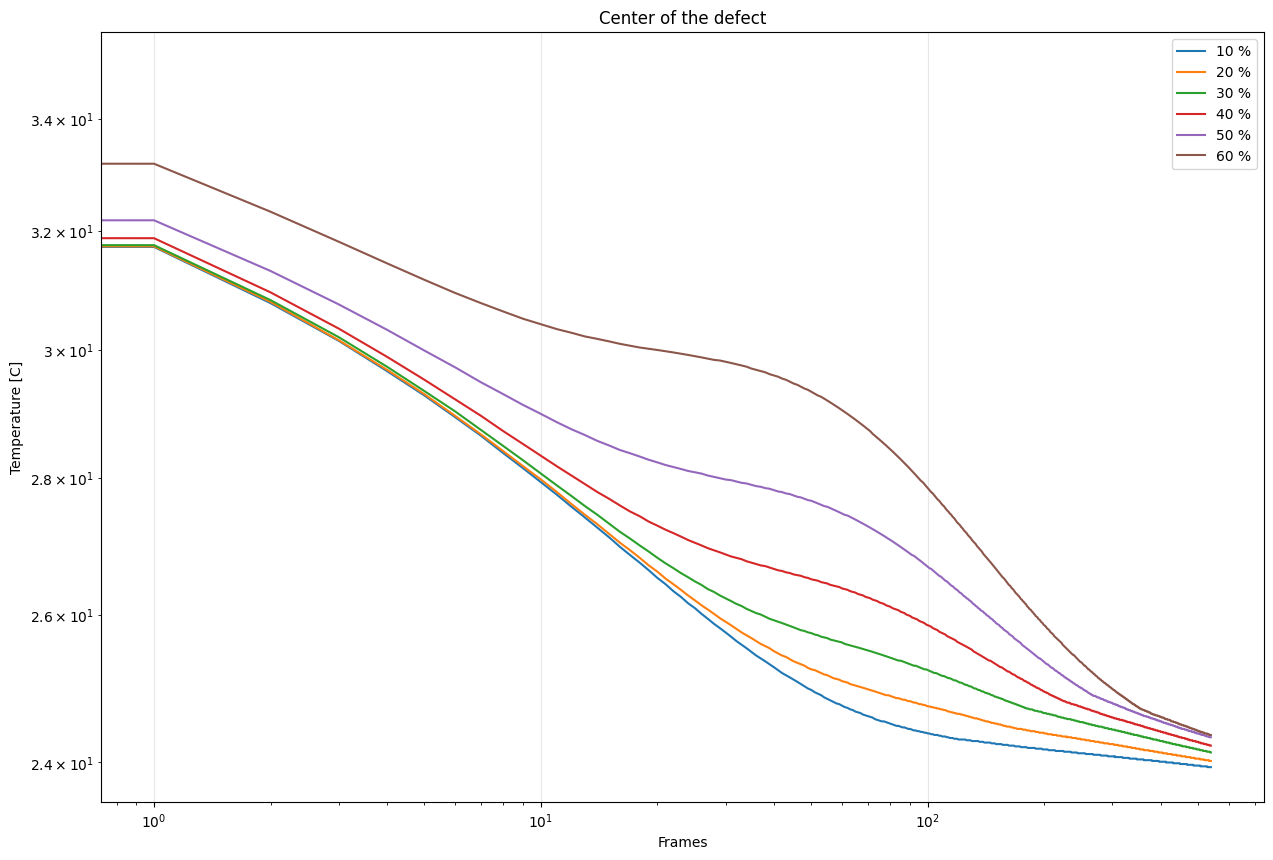

In [36]:
plt.figure(figsize=(15,10))
plt.loglog(data_1['data'][34:,205,205],label='10 %')
plt.loglog(data_2['data'][34:,205,205],label='20 %')
plt.loglog(data_3['data'][34:,205,205],label='30 %')
plt.loglog(data_4['data'][34:,205,205],label='40 %')
plt.loglog(data_5['data'][34:,205,205],label='50 %')
plt.loglog(data_6['data'][34:,205,205],label='60 %')
plt.title('Center of the defect')
plt.grid(alpha=0.3)
plt.ylabel('Temperature [C]')
plt.xlabel('Frames')
plt.legend()


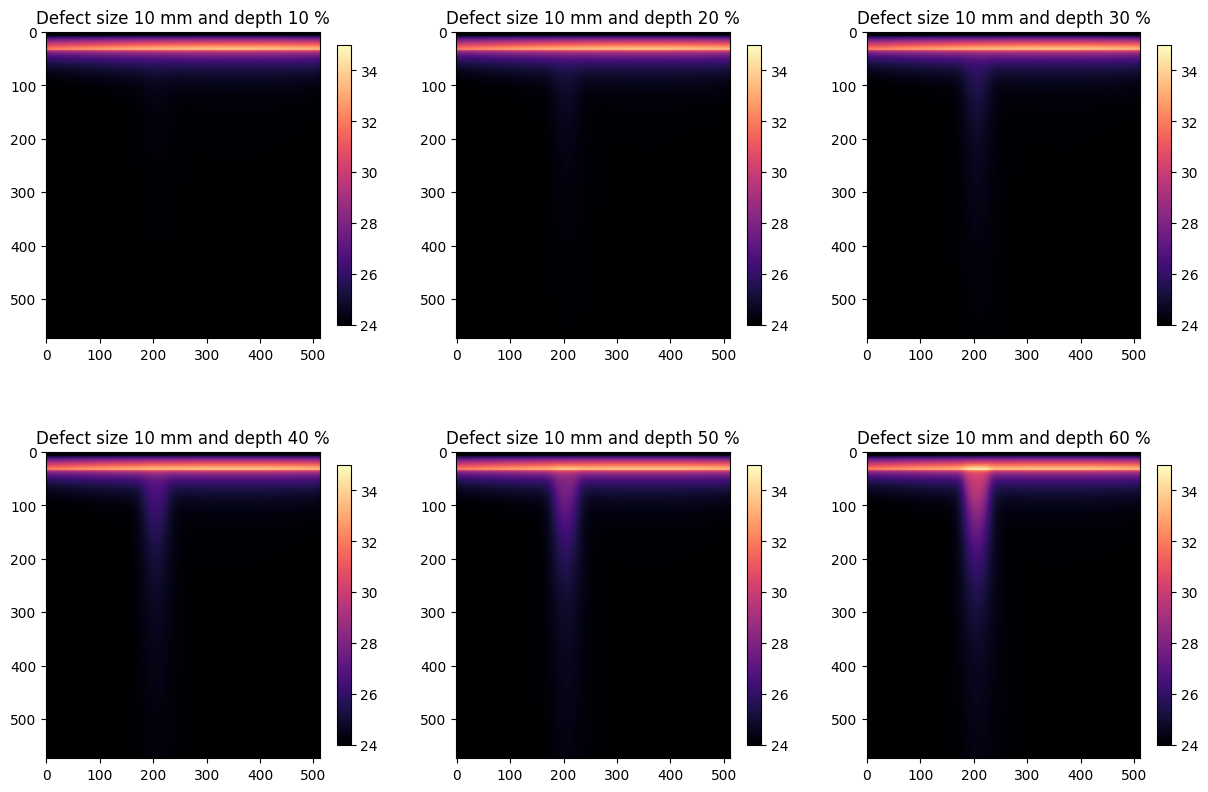

In [31]:
upper=35
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(data_1['data'][:,205,:],vmin=24,vmax=upper,cmap='magma')
plt.title('Defect size 10 mm and depth 10 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,2)
plt.imshow(data_2['data'][:,205,:],vmin=24,vmax=upper,cmap='magma')
plt.title('Defect size 10 mm and depth 20 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,3)
plt.imshow(data_3['data'][:,205,:],vmin=24,vmax=upper,cmap='magma')
plt.title('Defect size 10 mm and depth 30 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,4)
plt.imshow(data_4['data'][:,205,:],vmin=24,vmax=upper,cmap='magma')
plt.title('Defect size 10 mm and depth 40 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,5)
plt.imshow(data_5['data'][:,205,:],vmin=24,vmax=upper,cmap='magma')
plt.title('Defect size 10 mm and depth 50 %')
plt.colorbar(shrink=0.8)

plt.subplot(2,3,6)
plt.imshow(data_6['data'][:,205,:],vmin=24,vmax=upper,cmap='magma')
plt.title('Defect size 10 mm and depth 60 %')
plt.colorbar(shrink=0.8)

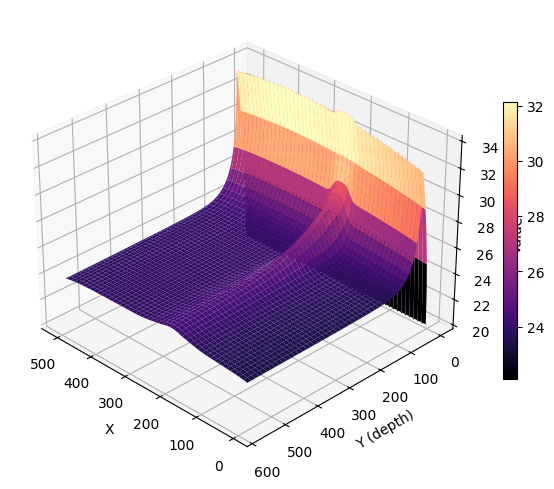

In [50]:
from matplotlib.colors import Normalize

Z = data_5['data'][:, 205, :]   # (Y, X)

# norm = Normalize(vmin=24, vmax=25)

ny, nx = Z.shape
x = np.arange(nx)
y = np.arange(ny)

X, Y = np.meshgrid(x, y)

# invert Y so "beginning" goes to the back
Y = Y[::-1]
Z = Z[::-1, :]


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(
    X, Y, Z,
    cmap='magma',
    
    linewidth=0,
    antialiased=True
)

ax.set_xlabel("X")
ax.set_ylabel("Y (depth)")
ax.set_zlabel("Value")

fig.colorbar(surf, ax=ax, shrink=0.6)
ax.view_init(elev=30, azim=135)

plt.show()

In [52]:
data_1=np.load("/Volumes/KINGSTON/temporal_thermography_imaging_2.npz",allow_pickle=True)
data_2=np.load("/Volumes/KINGSTON/temporal_thermography_imaging_21.npz",allow_pickle=True)
data_3=np.load('/Volumes/KINGSTON/temporal_thermography_imaging_22.npz',allow_pickle=True)
data_4=np.load('/Volumes/KINGSTON/temporal_thermography_imaging_23.npz',allow_pickle=True)

Text(0.5, 1.0, 'Real defect')

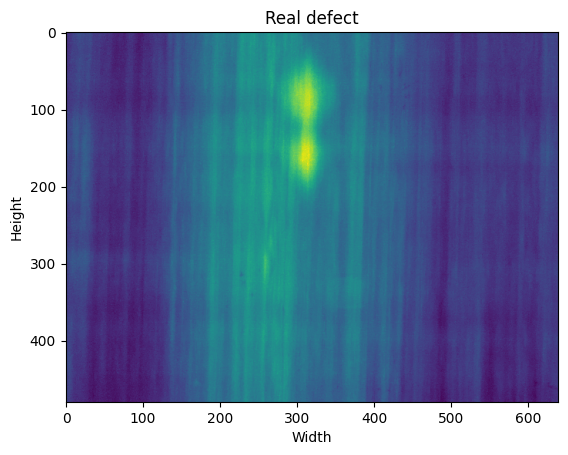

In [53]:
plt.imshow(data_1['data'][100,:,:])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Real defect')

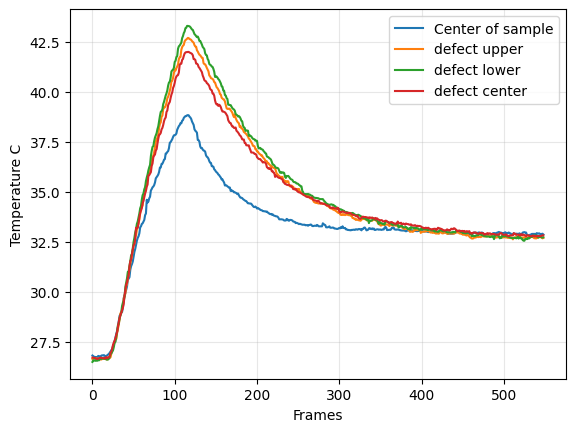

In [54]:
T,Y,X=data_1['data'].shape
Y_center=Y//2
X_center=X//2
plt.plot(data_1['data'][:,Y_center,X_center]/100-273.15,label='Center of sample')
plt.plot(data_1['data'][:,80,309]/100-273.15,label='defect upper')
plt.plot(data_1['data'][:,150,309]/100-273.15,label='defect lower')
plt.plot(data_1['data'][:,120,309]/100-273.15,label='defect center')
plt.grid(alpha=0.3)
plt.xlabel('Frames')
plt.ylabel('Temperature C')
plt.legend()

Text(0.5, 0, 'Width')

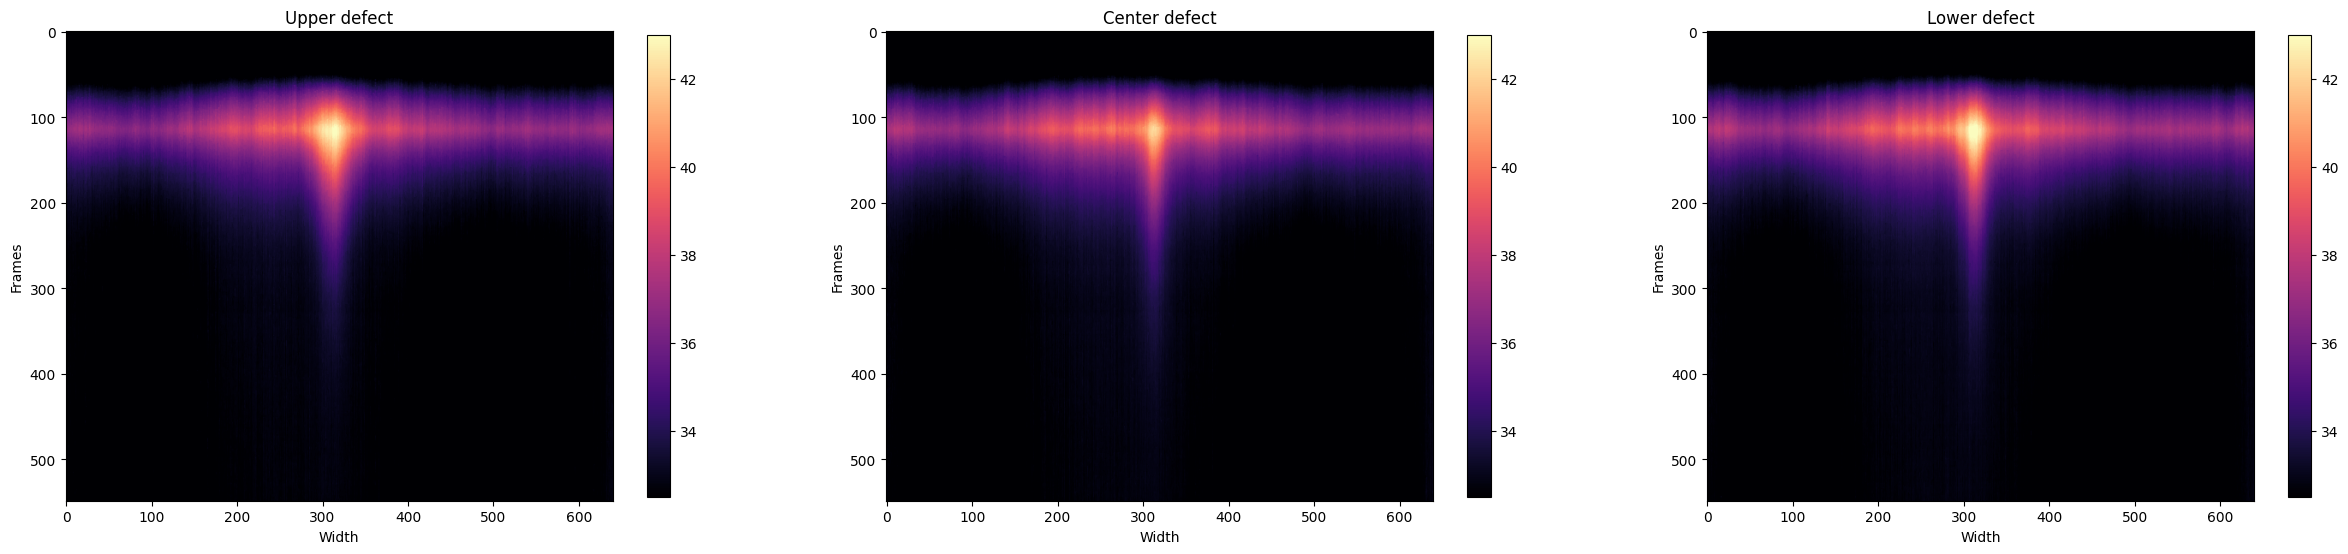

In [57]:
plt.figure(figsize=(30,20))
plt.subplot(1,3,1)
plt.imshow(data_1['data'][:,80,:]/100-273.15,vmin=32.5,vmax=43,cmap='magma')
plt.title('Upper defect')
plt.colorbar(shrink=0.3)
plt.ylabel('Frames')
plt.xlabel('Width')

plt.subplot(1,3,2)
plt.imshow(data_1['data'][:,120,:]/100-273.15,vmin=32.5,vmax=43,cmap='magma')
plt.title('Center defect')
plt.colorbar(shrink=0.3)
plt.ylabel('Frames')
plt.xlabel('Width')

plt.subplot(1,3,3)
plt.imshow(data_1['data'][:,150,:]/100-273.15,vmin=32.5,vmax=43,cmap='magma')
plt.title('Lower defect')
plt.colorbar(shrink=0.3)
plt.ylabel('Frames')
plt.xlabel('Width')



Text(0.5, 0, 'Width')

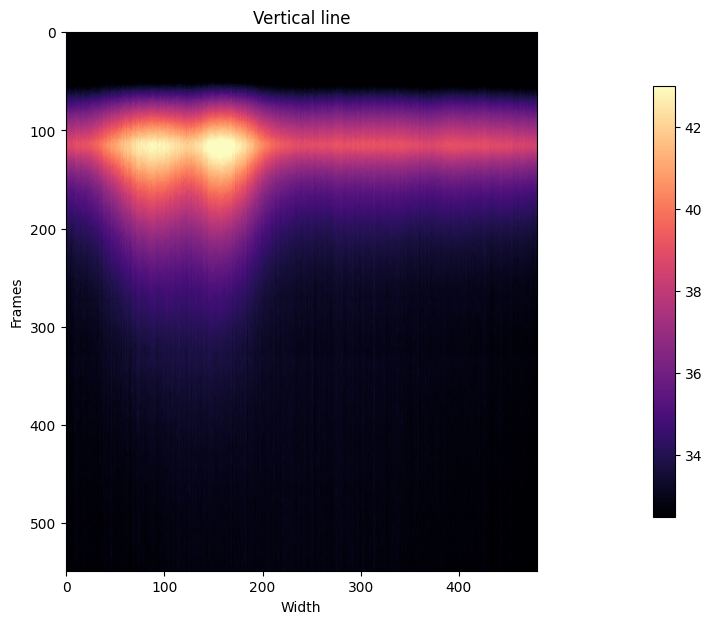

In [56]:
plt.figure(figsize=(30,7))
plt.imshow(data_1['data'][:,:,309]/100-273.15,vmin=32.5,vmax=43,cmap='magma')
plt.title('Vertical line')
plt.colorbar(shrink=0.8)
plt.ylabel('Frames')
plt.xlabel('Width')